
### Face Mask detection with EffecientDet trained on a custom dataset.





# Setting up our envionment

We clone the monk object detection library to use the EfficientDet model within it.

In [1]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 22.39 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [2]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 354.0 MB 5.0 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17464 sha256=7647d20d151acfe0511ef36f92826d849a39a8a8db2ccae2e456a413666e844a
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-ywa0lzu7/pycocotools_f99ae5bb179d4eccb08ade78c5e07e00
  Running command git clone -q https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-ywa0lzu7/pycocotools_f99ae5bb179d4eccb08ade78c5e07e00
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=264298 sha256=b922bb0be7b7436289f782878d24f50cb9e16f38dd6f1a71aca763900c7a1bc9
  Stored in directory: /tmp/pip-ephem-wheel-ca

We install tqdm libraries for progress bar. efficeintnet as a dependency for EffecientDet and tensorboardx for visualization.



In [3]:
#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

     | 91 kB 2.2 MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47880 sha256=f829a4821e5af8376abd3a2b2e1e41e5ba99129635f830af82285bdb1bc0e743
  Stored in directory: /tmp/pip-ephem-wheel-cache-l4oohcun/wheels/b5/36/d9/593e7ac06d343d0a32138fa6c402dc3a0bd31442c9fe53f76c
Successfully built tqdm
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstalling tqdm-4.64.0:
      Successfully uninstalled tqdm-4.64.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.28.1 which is incompatible.
panel 0.12.1 requires tqdm>=4.48.0, but you have tqdm 4.28.1 which is incompatible.
fbprophet 0.7.1 requires tqdm>=4.36.1, but you have tqdm 4.28.1 which is incompatible.
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl

# Let's get some data! 

The best part about Roboflow is the efficient management of your datasets. [Upload you dataset](roboflow.ai) and you will recieve a fresh curl code to ouput it in whatever augmented and annotated format you need. 

In [4]:
# our dataset is in Coco Json format

!curl -L https://app.roboflow.com/ds/OdQSzzzMZ9?key=YLpdqBoCW1 > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1871      0 --:--:-- --:--:-- --:--:--  1875
100 50.1M  100 50.1M    0     0  43.6M      0  0:00:01  0:00:01 --:--:--  101M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_annotations.coco.json  
 extracting: test/maksssksksss104_png.rf.67187f00e0dc669fa4c8588f18a52d56.jpg  
 extracting: test/maksssksksss10_png.rf.5a9fa4add22945d5784b7a98ac417d23.jpg  
 extracting: test/maksssksksss111_png.rf.c1f90ca5e9c580ff3d5f2088bae269ea.jpg  
 extracting: test/maksssksksss117_png.rf.7e94cfdd2103f274d64e99014148fc3c.jpg  
 extracting: test/maksssksksss153_png.rf.e4eb83960a295b2e0c2d9997d39c1622.jpg  
 extracting: test/maksssksksss158_png.rf.3ca844d33694eb2549374807cbdf0fa6.jpg  
 extracting: test/maksssksksss160_png.rf.54f

In [5]:
#let's take a look at our directory
#notice the data came down in train, valid, test, splits - this is pre set during the dataset upload process
%ls

Monk_Object_Detection/  README.roboflow.txt  test/   valid/
README.dataset.txt      sample_data/         train/


In [6]:
#let's take a peak in train
#jpg images and some coco json annotations
%ls train

_annotations.coco.json
maksssksksss100_png.rf.384485b5c101fa6b573488fde1bfcdf1.jpg
maksssksksss100_png.rf.a85a3b2402aae59abd4fb788538b2b8c.jpg
maksssksksss100_png.rf.f7142f1abaae553b67fd7f6ff3b4c302.jpg
maksssksksss101_png.rf.747f14d888e88a78862fc8e7f208d813.jpg
maksssksksss101_png.rf.b075ae948a13c76cdf6616d8f89eb43c.jpg
maksssksksss101_png.rf.fad8ffd0df341258087b6d6a108a428c.jpg
maksssksksss102_png.rf.1d37d7d40129e6b1b0ca7777d34b761f.jpg
maksssksksss102_png.rf.4f32ed99eb9c9c50cc1096d42fcf27b5.jpg
maksssksksss102_png.rf.9075d6b7c96924c894cffb6e0474a859.jpg
maksssksksss105_png.rf.0f312791a9840196efdfcc3a6fa9bcbd.jpg
maksssksksss105_png.rf.3a68a433799497b3cdd2bbb729e7eea2.jpg
maksssksksss105_png.rf.e19b7bb00cf953309752580e2db1288b.jpg
maksssksksss106_png.rf.618cd0ae0474ccf74c4e7fe3b577f06d.jpg
maksssksksss106_png.rf.7d63667e60baeca18f87e8f8f2b7b2d8.jpg
maksssksksss106_png.rf.8e2d5a2fcaa78299574d464ba5c046a4.jpg
maksssksksss107_png.rf.7dae026fddeae5490b86fb0882061cf6.jpg
maksssksksss107_p

In [7]:
#in the next three cells, we move the data into a structure that the image detection library will be expecting
#but no file data manipulation is necessary
#images can also be segmented into class folders, but we combine all classes here
!mkdir mask
!mkdir mask/annotations
!mkdir mask/Annotations
!mkdir mask/Images

In [8]:
%cp train/_annotations.coco.json mask/annotations/instances_Images.json

In [9]:
%cp train/*.jpg mask/Images/

# Training

In this section we set up the efficientDet-d0 model from backbone and train to our custom case

In [10]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [11]:
from train_detector import Detector

In [12]:
gtf = Detector();

In [13]:
#directs the model towards file structure
root_dir = "./";
coco_dir = "mask";
img_dir = "./";
set_dir = "Images";

In [14]:
#smells like some free compute from Colab, nice
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [15]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [16]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [17]:
%%time
gtf.Train(num_epochs=1, model_output_dir="trained/");

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


KeyboardInterrupt: ignored

# Inference

In [61]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [62]:
from infer_detector import Infer

In [63]:
gtf = Infer();

In [64]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained/")

In [65]:
#extract class list from our annotations
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [66]:
class_list

['mask', 'mask_weared_incorrect', 'with_mask', 'without_mask']

In [67]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.031s)
CPU times: user 59.4 ms, sys: 583 µs, total: 60 ms
Wall time: 59 ms


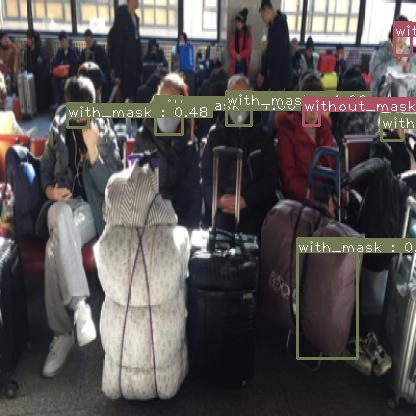

In [68]:
from IPython.display import Image
Image(filename='output.jpg') 

In [69]:
print(boxes.cpu().numpy())

[[155.0547    96.252464 182.82436  134.98587 ]
 [226.45607   91.84347  251.61668  125.61644 ]
 [303.66772   97.44092  319.80426  125.05937 ]
 [297.1329   238.34755  357.88815  358.75015 ]
 [ 67.15662  103.36196   88.914894 127.80837 ]
 [381.69464  114.046486 402.2159   140.84076 ]
 [394.93622   22.696875 411.85147   55.557816]
 [263.00314  217.41618  291.04044  294.32703 ]
 [ 75.575806 105.6709    95.21687  143.84364 ]
 [399.39365  101.76336  412.52896  135.26212 ]
 [ 79.57635  114.895744  96.88935  152.4658  ]]


In [70]:
%%time
import numpy as np

test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]

k = open("Effnet_test_data.txt","w")

#np.array_str(test_array)

for g in test_images:
  img_path = "test/" + random.choice(test_images);
  duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
  #k.write(g+","+np.array_str(boxes.cpu().numpy())+" "+np.array_str(scores.cpu().numpy())+" "+np.array_str(labels.cpu().numpy())+"\n")
  out = "test/" + g + ","
  i = 0
  for b in boxes.cpu().numpy():
    out = out + "[" + str(b[0]) + ", " + str(b[1]) + ", " + str(b[2]) + ", " + str(b[3]) + ", 1.0, 1.0, " + str(labels.cpu().numpy()[i]-1) +"]"
    i+=1
  k.write(out + "\n")



Done. (0.031s)
Done. (0.034s)
Done. (0.031s)
Done. (0.031s)
Done. (0.035s)
Done. (0.030s)
Done. (0.029s)
Done. (0.030s)
Done. (0.030s)
Done. (0.031s)
Done. (0.031s)
Done. (0.030s)
Done. (0.034s)
Done. (0.038s)
Done. (0.031s)
Done. (0.030s)
Done. (0.031s)
Done. (0.035s)
Done. (0.031s)
Done. (0.032s)
Done. (0.034s)
Done. (0.035s)
Done. (0.035s)
Done. (0.032s)
Done. (0.031s)
Done. (0.034s)
Done. (0.035s)
Done. (0.031s)
Done. (0.031s)
Done. (0.034s)
Done. (0.031s)
Done. (0.035s)
Done. (0.031s)
Done. (0.034s)
Done. (0.031s)
Done. (0.031s)
Done. (0.030s)
Done. (0.032s)
Done. (0.031s)
Done. (0.031s)
Done. (0.030s)
Done. (0.038s)
Done. (0.031s)
Done. (0.030s)
Done. (0.031s)
Done. (0.036s)
Done. (0.031s)
Done. (0.034s)
Done. (0.030s)
Done. (0.033s)
Done. (0.033s)
Done. (0.032s)
Done. (0.035s)
Done. (0.034s)
Done. (0.031s)
Done. (0.031s)
Done. (0.031s)
Done. (0.039s)
Done. (0.033s)
Done. (0.035s)
Done. (0.032s)
Done. (0.034s)
Done. (0.031s)
Done. (0.031s)
Done. (0.035s)
Done. (0.034s)
Done. (0.0

# Export Trained Weights

In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%mkdir trained_export
%cp ./trained/signatrix_efficientdet_coco.onnx ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).onnx
%cp ./trained/signatrix_efficientdet_coco.pth ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).pth
%mv ./trained_export/* /content/drive/My\ Drive/